<a href="https://colab.research.google.com/github/nicolasemeraro/ML-Project/blob/main/DV_finale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set()

# 1. Load data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/city_temperature.csv', low_memory= False)
df.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.20
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.40
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.80
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.40
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.90


## 1.1 Dataframe info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906327 entries, 0 to 2906326
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Region          object 
 1   Country         object 
 2   State           object 
 3   City            object 
 4   Month           int64  
 5   Day             int64  
 6   Year            int64  
 7   AvgTemperature  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 177.4+ MB


## 1.2 Dataframe dimensions

The data set consists of

In [ ]:
print(f'{df.shape[1]} columns and {df.shape[0]} rows.')

8 columns and 2906327 rows.


## 1.3 Missing values per column

In [ ]:
pd.DataFrame({'Null values': df.isnull().sum(), 'Percentage (%)': round((df.isnull().sum()/df.shape[0]) * 100, 2)}).transpose()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
Null values,0.00,0.00,1450990.00,0.00,0.00,0.00,0.00,0.00
Percentage (%),0.00,0.00,49.93,0.00,0.00,0.00,0.00,0.00


Only the column `state` has missing values. These correspond to almost half (50%) of the column data.

## 1.4 Dataframe descriptive statistics

In [ ]:
pd.options.display.float_format = '{:.2f}'.format # to avoid scientific notation
df.describe()

,Month,Day,Year,AvgTemperature
count,2906327.00,2906327.00,2906327.00,2906327.00
mean,6.47,15.72,2006.62,56.00
std,3.46,8.80,23.38,32.12
min,1.00,0.00,200.00,-99.00
25%,3.00,8.00,2001.00,45.80
50%,6.00,16.00,2007.00,62.50
75%,9.00,23.00,2013.00,75.50
max,12.00,31.00,2020.00,110.00


Here you can see some points to analyze more closely:

* The minimum of the column `day` is **ZERO**, certainly incorrectly entered data, which configures an inconsistency.

* And the minimum of the average temperature column, after all -99 °F corresponds to approximately - 73 °C. Despite being a possible temperature value for very cold areas of the planet, it is important to analyze the data with this value.
* In the column `year`, the smallest value that appears is 200.

# 2. Data treatment

## 2.1 Column renaming

As a good practice, columns are renamed in all lowercase characters:

In [ ]:
df = df.rename(
    columns= {'Region': 'region', 'Country': 'country', 'State': 'state', 'City': 'city',
              'Month': 'month', 'Day': 'day', 'Year': 'year', 'AvgTemperature': 'avg_temperature'}
)
df.head(2)

,region,country,state,city,month,day,year,avg_temperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.20
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.40


In [ ]:

df['year'].unique()

array([1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020,  201,  200])

## 2.2 Treatment of inconsistent data

Data considered inconsistent, just by analyzing the table of descriptive statistics, are days with zero value, average temperatures of -99 ºF and the minimum value 200 for year. Checking each case:

### 2.2.1 Column `day` data with values ​​equal to zero

In [ ]:
day_zero = df.query('day == 0')
day_zero

,region,country,state,city,month,day,year,avg_temperature
82774,Africa,Guinea,NaN,Conakry,3,0,2008,-99.00
85697,Africa,Guinea,NaN,Conakry,3,0,2016,-99.00
92041,Africa,Guinea-Bissau,NaN,Bissau,3,0,2008,-99.00
146077,Africa,Malawi,NaN,Lilongwe,3,0,2012,-99.00
177862,Africa,Nigeria,NaN,Lagos,3,0,2008,-99.00
241159,Africa,Uganda,NaN,Kampala,3,0,2012,-99.00
1209901,North America,Mexico,NaN,Guadalajara,3,0,2012,-99.00
1333910,South/Central America & Carribean,Cuba,NaN,Havana,3,0,2008,-99.00


In [ ]:
f'Number of rows: {day_zero.shape[0]}'

'Number of rows: 8'

In all cases where there is **ZERO** day there is also a temperature of -99 °F.

### 2.2.2 Column `year` with inconsistent values

In [ ]:
year_inconsistent = df.query('year < 1995').sample(10)
year_inconsistent

,region,country,state,city,month,day,year,avg_temperature
155024,Africa,Mozambique,NaN,Maputo,12,28,201,-99.00
744176,Europe,Germany,NaN,Hamburg,12,22,201,-99.00
743387,Europe,Germany,NaN,Hamburg,12,23,200,-99.00
845928,Europe,Norway,NaN,Oslo,12,20,200,-99.00
1212426,North America,Mexico,NaN,Guadalajara,12,26,201,-99.00
744157,Europe,Germany,NaN,Hamburg,12,3,201,-99.00
232908,Africa,Tanzania,NaN,Dar Es Salaam,12,10,201,-99.00
753395,Europe,Germany,NaN,Munich,12,22,201,-99.00
58188,Africa,Ethiopia,NaN,Addis Ababa,12,13,201,-99.00
155021,Africa,Mozambique,NaN,Maputo,12,25,201,-99.00


Again, in all cases where there is inconsistency in the column `year` data, there is also the average temperature of -99 °F.

In [ ]:
year_inconsistent['avg_temperature'].unique()

array([-99.])

### 2.2.3 -99 °F temperature in column `avg_temperature`

In [ ]:
df.query('avg_temperature == -99')

,region,country,state,city,month,day,year,avg_temperature
220,Africa,Algeria,NaN,Algiers,8,9,1995,-99.00
221,Africa,Algeria,NaN,Algiers,8,10,1995,-99.00
408,Africa,Algeria,NaN,Algiers,2,13,1996,-99.00
409,Africa,Algeria,NaN,Algiers,2,14,1996,-99.00
1453,Africa,Algeria,NaN,Algiers,12,24,1998,-99.00
...,...,...,...,...,...,...,...,...
2905471,North America,US,Additional Territories,San Juan Puerto Rico,3,29,2011,-99.00
2905534,North America,US,Additional Territories,San Juan Puerto Rico,5,31,2011,-99.00
2905689,North America,US,Additional Territories,San Juan Puerto Rico,11,2,2011,-99.00
2905726,North America,US,Additional Territories,San Juan Puerto Rico,12,9,2011,-99.00


### 2.2.4 Drop inconsisten values

The condition used to eliminate the data is to remove where the mean temperature is -99 °F. It was seen in 2.2.1 and 2.2.2, respectively, that where the day is zero and the year is also inconsistent there is this temperature.

The data that will be removed corresponds, in percentage, to:

In [ ]:
f'{round((df.query("avg_temperature == -99").shape[0]/df.shape[0]) * 100, 2)}%'

'2.74%'

As inconsistent data corresponds to a tiny amount of the entire dataset, these values ​​can be dropped:

In [ ]:
df = df.drop(df.query('avg_temperature == -99').index).reset_index(drop= True) # adjust index after dropping the data
df

,region,country,state,city,month,day,year,avg_temperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.20
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.40
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.80
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.40
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.90
...,...,...,...,...,...,...,...,...
2826650,North America,US,Additional Territories,San Juan Puerto Rico,7,27,2013,82.40
2826651,North America,US,Additional Territories,San Juan Puerto Rico,7,28,2013,81.60
2826652,North America,US,Additional Territories,San Juan Puerto Rico,7,29,2013,84.20
2826653,North America,US,Additional Territories,San Juan Puerto Rico,7,30,2013,83.80


## 2.3 Drop of `state` column

In [ ]:
null_in_state_column = df.loc[df['state'].isna()].shape[0]
print(f'Null data in state column: {null_in_state_column}')

Null data in state column: 1376100


As most of the state column is null data and will not be the focus of the analysis, the data can be dropped.

In [ ]:
df = df.drop('state', axis= 1)
df.head(2)

,region,country,city,month,day,year,avg_temperature
0,Africa,Algeria,Algiers,1,1,1995,64.20
1,Africa,Algeria,Algiers,1,2,1995,49.40


## 2.4 Temperature unit conversion

The unit of temperature in the dataset is the Fahrenheit scale (°F). However, this scale can be converted to the Celsius scale (°C):

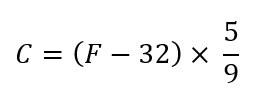

The lambda function is used to convert the data for each row in the dataset:

In [ ]:
df['avg_temperature'] = df['avg_temperature'].map(lambda x: (x - 32) * (5/9))
df.sample(10)

,region,country,city,month,day,year,avg_temperature
2506092,North America,US,Rapid City,11,5,2019,-0.56
59516,Africa,Gabon,Libreville,5,15,2014,27.39
1970745,North America,US,Boston,9,9,2011,19.33
1450592,North America,US,Phoenix,1,18,2012,13.22
785077,Europe,The Netherlands,Amsterdam,4,25,2014,16.67
852385,Europe,Spain,Barcelona,1,19,2003,8.83
2775253,North America,US,Green Bay,6,10,1997,19.72
1064965,Middle East,United Arab Emirates,Dubai,7,27,2001,37.89
404736,Asia,Myanmar (Burma),Rangoon,11,23,2019,27.61
2317672,North America,US,Cleveland,6,1,2000,22.67


## 2.5 Derivate columns from date columns

### 2.5.1 Date (YYY-MM-dd) column

In [ ]:
df['date'] = pd.to_datetime(df[['day', 'month', 'year']], format='%d-%m-%Y')
df.sample(2)

,region,country,city,month,day,year,avg_temperature,date,quarter_of_year,century
2015430,North America,US,Sault Ste Marie,10,22,2007,12.39,2007-10-22,2007 - Q4,XXI
700860,Europe,Germany,Munich,4,18,2016,8.56,2016-04-18,2016 - Q2,XXI


### 2.5.2 Quarter of year column

In [ ]:
df['quarter_of_year'] = df['year'].astype(str) + ' - Q' + df['date'].dt.quarter.astype(str)
df.sample(2)

,region,country,city,month,day,year,avg_temperature,date,quarter_of_year
2770576,North America,US,Elkins,12,19,2009,-2.39,2009-12-19,2009 - Q4
1071477,Middle East,United Arab Emirates,Dubai,6,21,2019,36.11,2019-06-21,2019 - Q2


### 2.5.3 Century column

In [ ]:
df['century'] = df['year'].map(lambda x: 'XX' if x <= 2000 else 'XXI')
df.sample(5)

,region,country,city,month,day,year,avg_temperature,date,quarter_of_year,century
1885417,North America,US,Louisville,3,18,1996,7.89,1996-03-18,1996 - Q1,XX
1179013,South/Central America & Carribean,Bahamas,Nassau,1,10,1996,15.72,1996-01-10,1996 - Q1,XX
2030561,North America,US,Minneapolis St. Paul,8,4,1998,19.89,1998-08-04,1998 - Q3,XX
616171,Europe,Belgium,Brussels,10,30,2016,9.72,2016-10-30,2016 - Q4,XXI
2706996,North America,US,Norfolk,1,16,2013,7.17,2013-01-16,2013 - Q1,XXI


## 2.6 Columns `month` and `day` drop

The month and day columns will not be used in dataset analyses, so they are removed.

In [ ]:
df = df.drop(['day', 'month'], axis= 1)
df.head()

,region,country,city,year,avg_temperature,date,quarter_of_year,century
0,Africa,Algeria,Algiers,1995,17.89,1995-01-01,1995 - Q1,XX
1,Africa,Algeria,Algiers,1995,9.67,1995-01-02,1995 - Q1,XX
2,Africa,Algeria,Algiers,1995,9.33,1995-01-03,1995 - Q1,XX
3,Africa,Algeria,Algiers,1995,8.00,1995-01-04,1995 - Q1,XX
4,Africa,Algeria,Algiers,1995,8.83,1995-01-05,1995 - Q1,XX


In [ ]:
df.sample(10)

,region,country,city,year,avg_temperature,date,quarter_of_year,century
2603710,North America,US,Dallas Ft Worth,2008,30.22,2008-08-30,2008 - Q3,XXI
1587482,North America,US,Wilmington,1996,-9.89,1996-02-06,1996 - Q1,XX
2617959,North America,US,Houston,1997,1.11,1997-01-12,1997 - Q1,XX
1302758,South/Central America & Carribean,Guatemala,Guatemala City,2007,18.89,2007-02-08,2007 - Q1,XXI
382878,Asia,Malaysia,Kuala Lumpur,2009,26.50,2009-02-27,2009 - Q1,XXI
798674,Europe,Poland,Warsaw,1999,-1.39,1999-12-29,1999 - Q4,XX
1573596,North America,US,Bridgeport,2008,14.22,2008-09-23,2008 - Q3,XXI
918101,Europe,Ukraine,Kiev,2006,-4.67,2006-01-16,2006 - Q1,XXI
1110266,North America,Canada,Quebec,2006,16.72,2006-06-22,2006 - Q2,XXI
187843,Africa,Togo,Lome,2017,28.89,2017-02-14,2017 - Q1,XXI


# 3 Exploratory analysis

## 3.1 Column `avg_temperature`

### 3.1.1 Mean, median, mode and standard deviation

In [ ]:
pd.DataFrame({'Mean': df['avg_temperature'].mean(),
              'Median': df['avg_temperature'].median(),
              'Mode': df['avg_temperature'].mode()[0],
              'Standard deviation': df['avg_temperature'].std()},
             index= ['Values'])

,Mean,Median,Mode,Standard deviation
Values,15.76,17.39,26.78,10.61


### 3.1.2 Histogram

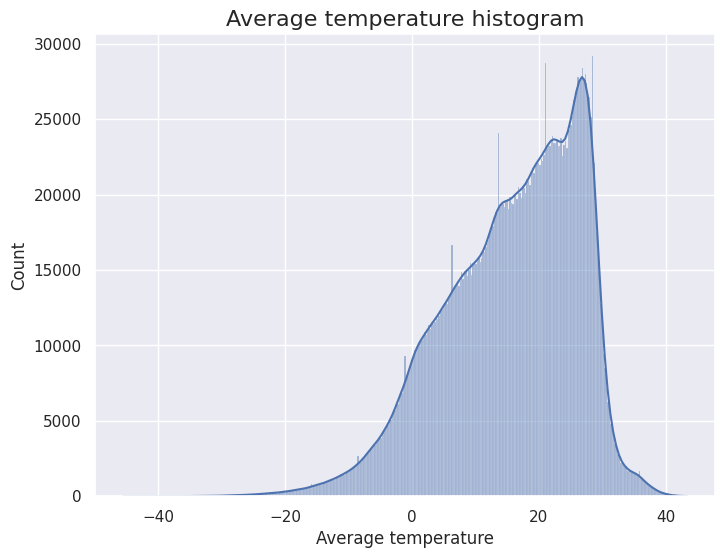

In [ ]:
plt.figure(figsize= (8, 6))
ax = sns.histplot(data= df, x= 'avg_temperature', kde= True)
ax.set_title('Average temperature histogram', fontsize= 16)
ax.set_xlabel('Average temperature')
plt.show()

### 3.1.3 Boxplot

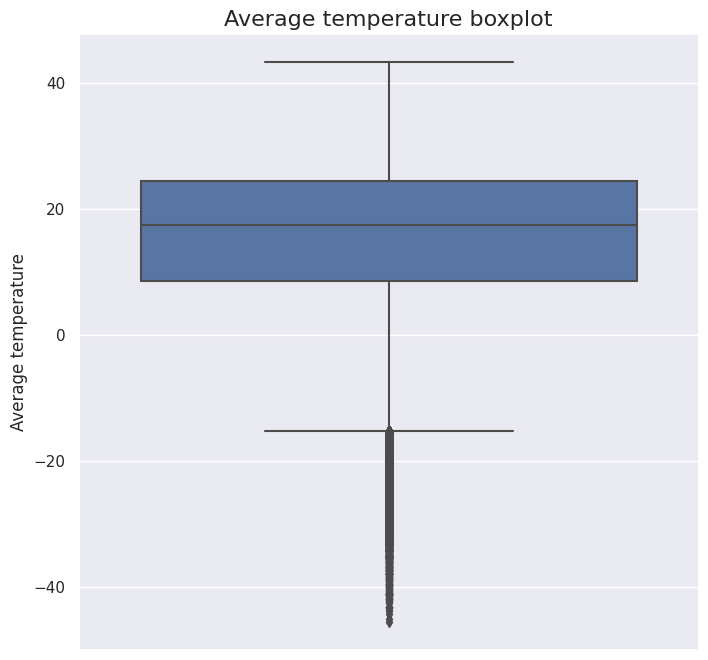

In [ ]:
plt.figure(figsize= (8, 8))
ax = sns.boxplot(data= df, y= 'avg_temperature')
ax.set_title('Average temperature boxplot', fontsize= 16)
ax.set_ylabel('Average temperature')
plt.show()

#### 3.1.4 Analysis of possible outliers

The lower fence of `avg_temperature` is calculated to analyze the data:

In [ ]:
lower_fence_temperature = df['avg_temperature'].quantile(0.25) - (1.5 * (df['avg_temperature'].quantile(0.75) - df['avg_temperature'].quantile(0.25)))

In [ ]:
temperature_outliers = df.query('avg_temperature < @lower_fence_temperature')
temperature_outliers.head()

,region,country,city,year,avg_temperature,date,quarter_of_year,century
261779,Asia,China,Shenyang,1996,-15.83,1996-01-15,1996 - Q1,XX
261780,Asia,China,Shenyang,1996,-18.56,1996-01-16,1996 - Q1,XX
261796,Asia,China,Shenyang,1996,-15.39,1996-02-01,1996 - Q1,XX
261803,Asia,China,Shenyang,1996,-15.22,1996-02-08,1996 - Q1,XX
261804,Asia,China,Shenyang,1996,-15.89,1996-02-09,1996 - Q1,XX


In [ ]:
temperature_outliers['quarter_of_year'].unique()

array(['1996 - Q1', '1996 - Q4', '1997 - Q1', '1998 - Q1', '1998 - Q4',
       '1999 - Q4', '2000 - Q1', '2000 - Q4', '2001 - Q1', '2001 - Q4',
       '2002 - Q1', '2002 - Q4', '2003 - Q1', '2004 - Q1', '2004 - Q4',
       '2005 - Q1', '2005 - Q4', '2006 - Q1', '2006 - Q4', '2007 - Q1',
       '2008 - Q1', '2008 - Q4', '2009 - Q1', '2009 - Q4', '2010 - Q1',
       '2010 - Q4', '2011 - Q1', '2011 - Q4', '2012 - Q1', '2012 - Q4',
       '2013 - Q1', '2013 - Q4', '2014 - Q1', '2014 - Q4', '2015 - Q1',
       '2015 - Q4', '2016 - Q1', '2016 - Q4', '2017 - Q1', '2017 - Q4',
       '2018 - Q1', '2018 - Q4', '2019 - Q1', '2019 - Q4', '2020 - Q1',
       '1999 - Q1', '1995 - Q1', '1995 - Q4', '1997 - Q4', '2007 - Q4',
       '2003 - Q4', '2002 - Q2', '2018 - Q2', '2003 - Q2', '2004 - Q2',
       '2013 - Q2'], dtype=object)

An analysis of the outliers shows that the data are from naturally cold regions and in really cold periods. Therefore, such data will not be removed.

## 3.2 Column `region`

### 3.2.1 Mean, median and standard deviation by region

In [ ]:
df.groupby('region')['avg_temperature'].agg(['mean', 'median', 'std'])

,mean,median,std
region,,,
Africa,23.56,24.89,5.15
Asia,20.06,24.22,10.96
Australia/South Pacific,16.84,16.72,5.40
Europe,11.08,11.44,8.44
Middle East,23.24,23.67,9.33
North America,13.42,14.72,10.73
South/Central America & Carribean,22.33,23.78,5.99


### 3.2.2 Histograms of average temperature by region

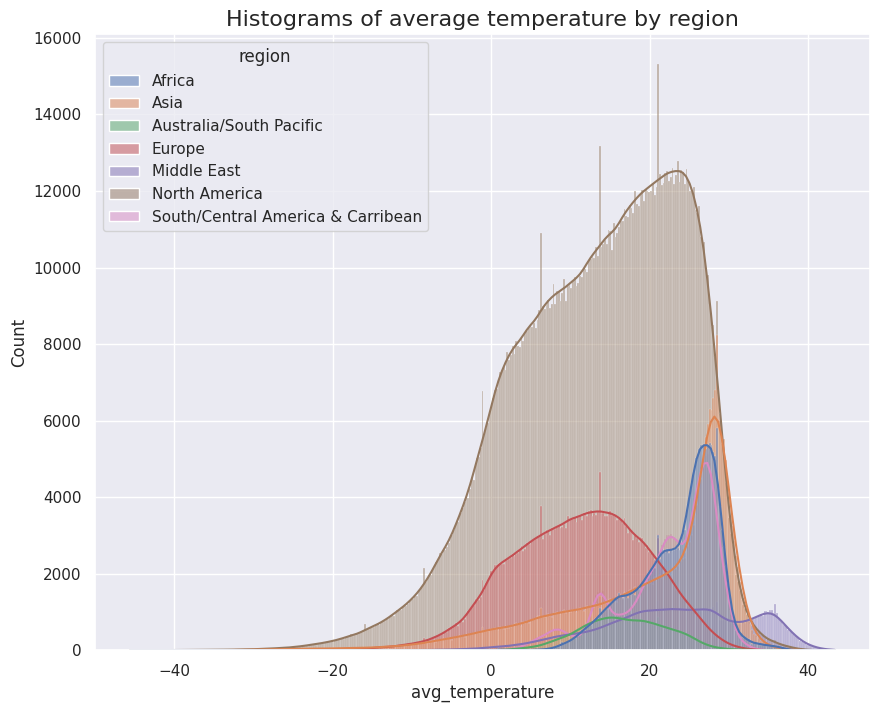

In [ ]:
plt.figure(figsize= (10, 8))
ax = sns.histplot(data= df, x= 'avg_temperature', hue= 'region', kde= True)
ax.set_title('Histograms of average temperature by region', fontsize= 16)
plt.show()

Here it is possible to see that the amount of data referring to North America is greater than the amount of data from other regions.

### 3.2.3 Boxplots of average temperature by region

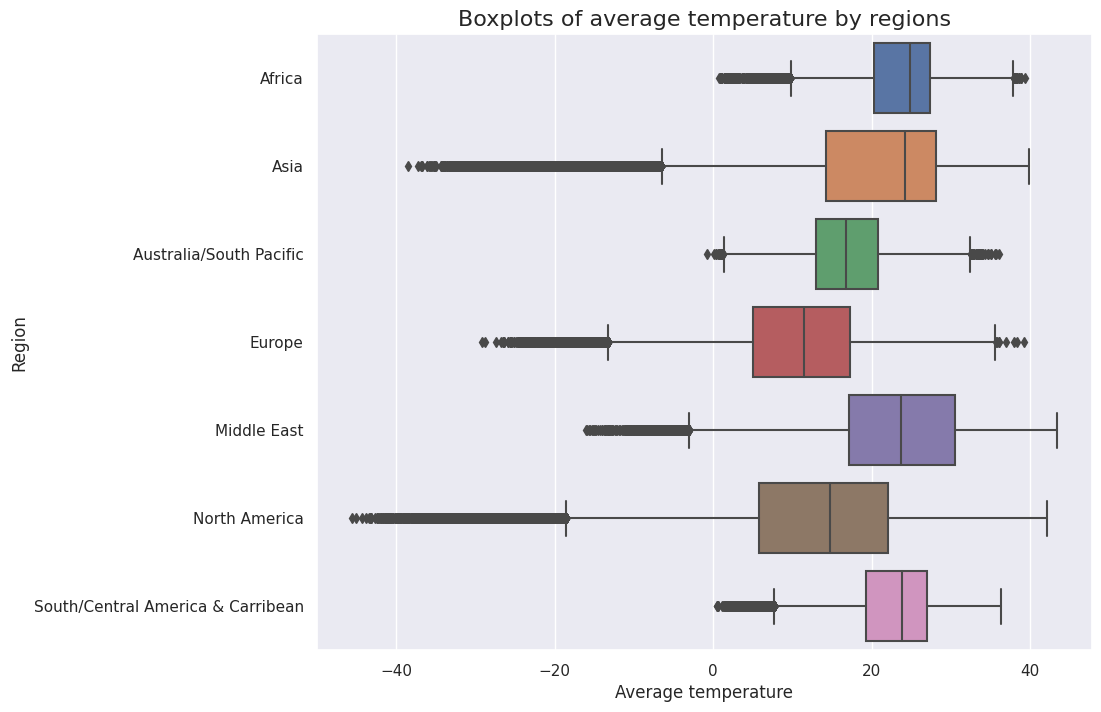

In [ ]:
plt.figure(figsize= (10, 8))
ax = sns.boxplot(data= df, x= 'avg_temperature', y= 'region')
ax.set_title('Boxplots of average temperature by regions', fontsize= 16)
ax.set_ylabel('Region')
ax.set_xlabel('Average temperature')
plt.show()

### 3.2.4 Data distribution in `region` column

In [ ]:
pd.DataFrame({'Count': df.value_counts('region'),
              'Percentage (%)': round(df.value_counts('region', normalize= True) * 100, 2)})

,Count,Percentage (%)
region,,
North America,1548160,54.77
Europe,368702,13.04
Asia,306163,10.83
Africa,220919,7.82
South/Central America & Carribean,206691,7.31
Middle East,120811,4.27
Australia/South Pacific,55209,1.95


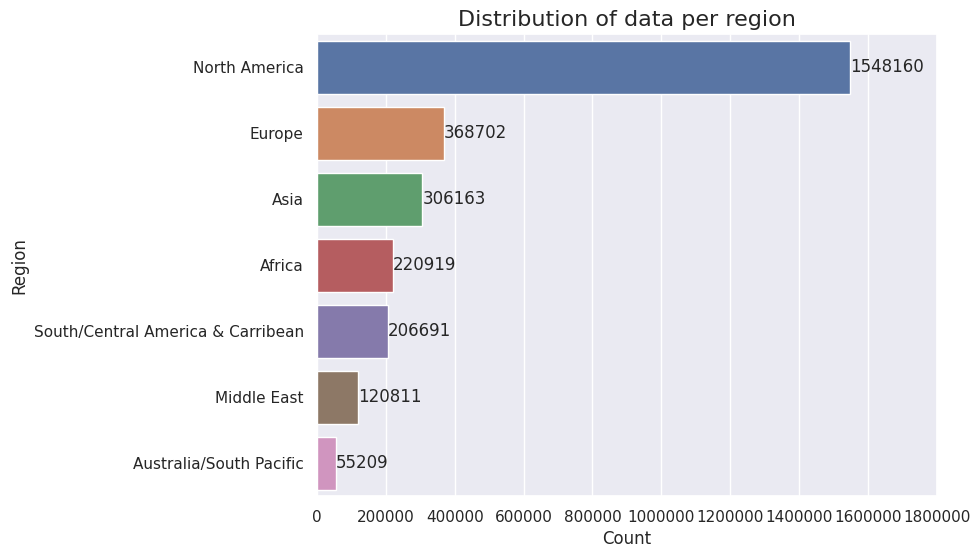

In [ ]:
plt.figure(figsize= (8, 6))
plt.ticklabel_format(style='plain', axis= 'x') # avoid scientific notation in xaxis
ax = sns.countplot(data= df, y= 'region', order= df.value_counts('region', ascending= False).index)

for container in ax.containers:
  ax.bar_label(container, fmt= '%d', label_type= 'edge')

plt.title('Distribution of data per region', fontsize= 16)
plt.ylabel('Region')
plt.xlabel('Count')
plt.xlim([0, 1.8e6])
plt.show()

### 3.2.5 Average temperature per year

Data for the year 2020 go through the month of May. Therefore, it does not cover all seasons, this generates a distortion in the analyzes as shown below:

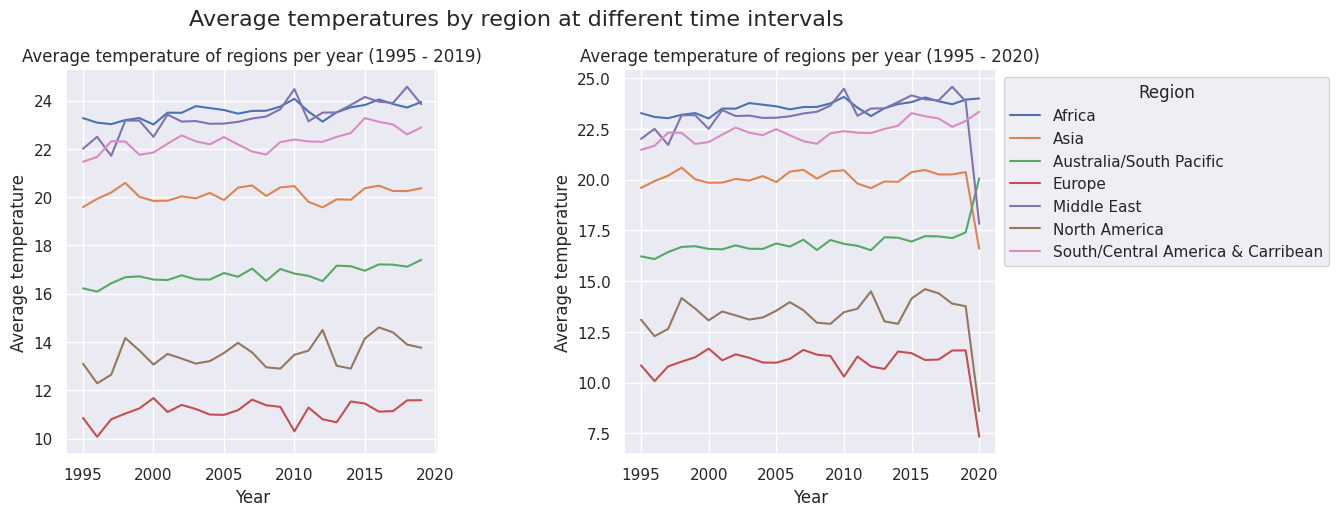

In [ ]:
region_temperature_per_year = df.query('year < 2020').groupby(['region', 'year'])['avg_temperature'].mean().reset_index()
region_temperature_per_year_with_2020 = df.query('year <= 2020').groupby(['region', 'year'])['avg_temperature'].mean().reset_index()

fig, ax = plt.subplots(1, 2, figsize= (12, 5))
fig.suptitle('Average temperatures by region at different time intervals', y= 1, fontsize= 16)
ax1 = sns.lineplot(data= region_temperature_per_year, x= 'year', y= 'avg_temperature', hue= 'region', ax= ax[0], legend= False)
ax1.set_title('Average temperature of regions per year (1995 - 2019)')
ax1.set_ylabel('Average temperature')
ax1.set_xlabel('Year')
ax2 = sns.lineplot(data= region_temperature_per_year_with_2020, x= 'year', y= 'avg_temperature', hue= 'region', ax= ax[1])
ax2.set_title('Average temperature of regions per year (1995 - 2020)')
ax2.legend(title= 'Region', bbox_to_anchor= (1, 1))
ax2.set_ylabel('Average temperature')
ax2.set_xlabel('Year')
plt.subplots_adjust(wspace= 0.5)
plt.show()

A linear regression graph can be plotted to track the average annual temperature trend for each continent.

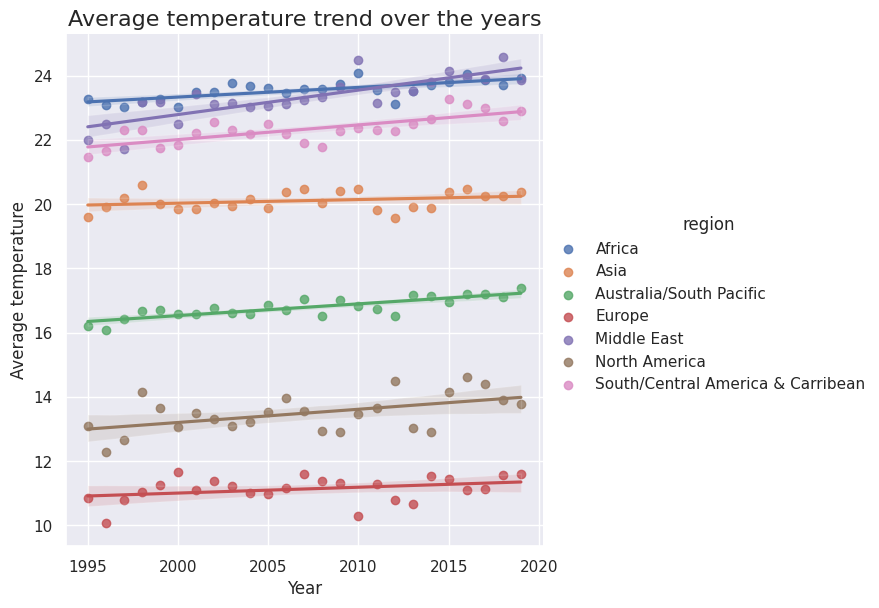

In [ ]:
sns.lmplot(data= region_temperature_per_year, x= 'year', y= 'avg_temperature', hue= 'region', height= 6)
plt.title('Average temperature trend over the years', fontsize= 16)
plt.ylabel('Average temperature')
plt.xlabel('Year')
plt.show()

It is possible to notice that the annual temperature averages of the continents are in different levels with

* Africa and the Middle East with higher average temperatures, followed by
* Central/South America and the Caribbean
* Asia and Australia/South Pacific at an intermediate level
* And finally North America and Europe with lower averages.

It is also important to note that the linear regression graph shows an increase in average temperatures over the years for all regions.

### 3.2.6 Average temperature per quarter

In [ ]:
region_temperature_per_quarter = df.query('year < 2020').groupby(['region', 'quarter_of_year'])['avg_temperature'].mean().reset_index()

fig = px.line(
    data_frame= region_temperature_per_quarter,
    x= 'quarter_of_year',
    y= 'avg_temperature',
    title= 'Average quarterly temperatures by continent',
    color= 'region', markers= True
)
fig.update_layout(title= {'x': 0.5}, xaxis_title= 'Quarters', yaxis_title= 'Average temperature')
fig.show()

Analyzing the graph it is possible to conclude that:

* The thermal amplitude between periods of higher and lower temperatures is smaller in South/Central America and the Caribbean as well as in the African continent.
* In South/Central America and the Caribbean, the quarters with the highest average temperature are Q1 and the lowest are Q3.
* In Africa the temperature averages are lower in Q1.
* Asia, Europe, the Middle East and North America have the highest average temperature in Q3 and the lowest average temperature in Q1.
* However, the warmest quarter occurs at a higher temperature in the Middle East and the lower temperature quarter occurs at a lower temperature in Europe.
* In Australia and the South Pacific, average temperatures are highest in Q1 and lowest in Q3.

## 3.3 Column `country`

### 3.3.1 Mean, median and standard deviation of average temperature per country

In [ ]:
country_count = df.value_counts('country', ascending= True).tail(20) # the 20 countries with the most records in the data set were selected.

top_20_countries = country_count.keys() # names of countries on the top 20 in number of records

df.query('country in @top_20_countries').groupby('country')['avg_temperature'].agg(['mean', 'median', 'std'])

,mean,median,std
country,,,
Australia,17.10,17.06,5.65
Brazil,22.21,22.33,3.33
Canada,5.86,7.06,11.61
China,15.91,18.22,10.89
Equador,20.76,23.72,5.91
France,12.99,12.83,6.46
Germany,9.97,10.22,7.78
India,26.97,28.11,4.81
Italy,14.29,14.44,7.44


### 3.3.2 Histograms of average temperature by country

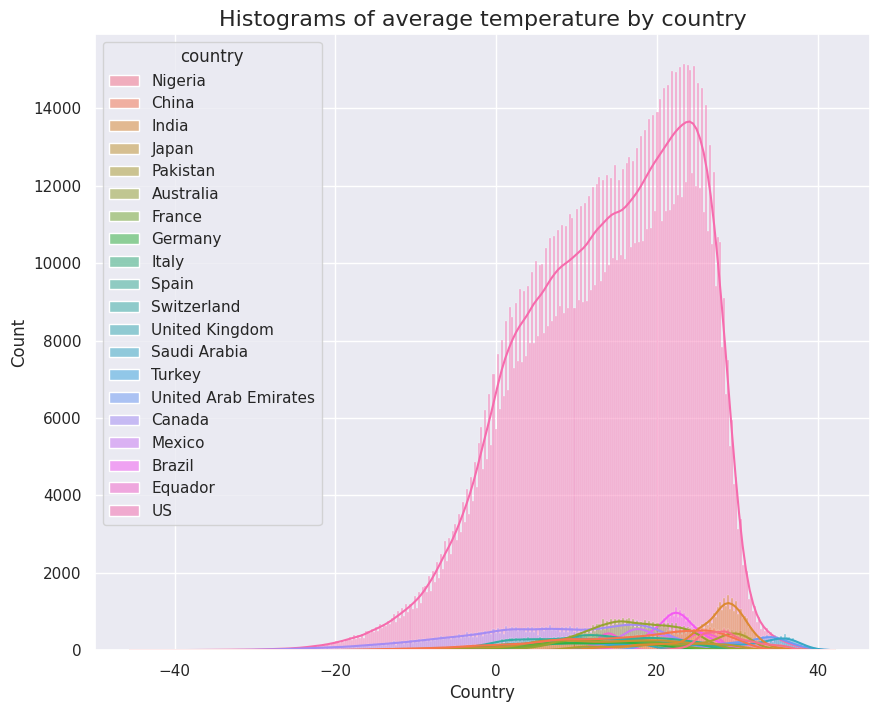

In [ ]:
plt.figure(figsize= (10, 8))
ax = sns.histplot(data= df.query('country in @top_20_countries'), x= 'avg_temperature', hue= 'country', kde= True)
ax.set_title('Histograms of average temperature by country', fontsize= 16)
ax.set_xlabel('Country')
plt.show()

Here it is possible to see that the amount of data referring to United States is greater than the amount of data from other regions.

### 3.3.3 Boxplots of average temperature by country

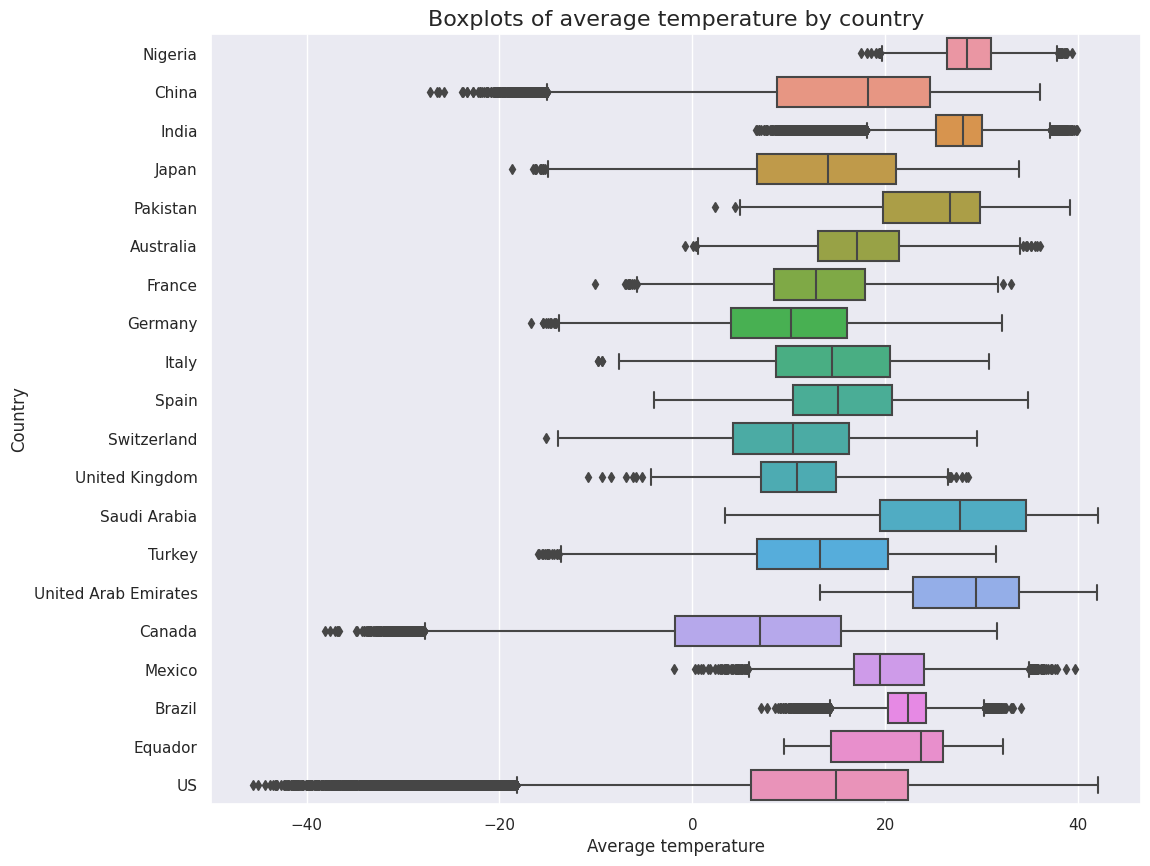

In [ ]:
plt.figure(figsize= (12, 10))
ax = sns.boxplot(data= df.query('country in @top_20_countries'), y= 'country', x= 'avg_temperature')
ax.set_title('Boxplots of average temperature by country', fontsize= 16)
ax.set_ylabel('Country')
ax.set_xlabel('Average temperature')
plt.show()

### 3.3.4 Data distribution in `country` column

In [ ]:
pd.DataFrame({'Count': country_count}).transpose()

country,Nigeria,Equador,Germany,Pakistan,Saudi Arabia,United Kingdom,France,United Arab Emirates,Italy,Turkey,Mexico,Brazil,Switzerland,Japan,Spain,India,Australia,China,Canada,US
Count,15101,15630,17541,18076,18418,18442,18450,18465,18471,18472,23640,27496,27681,27710,27712,36903,46002,46139,73965,1450555


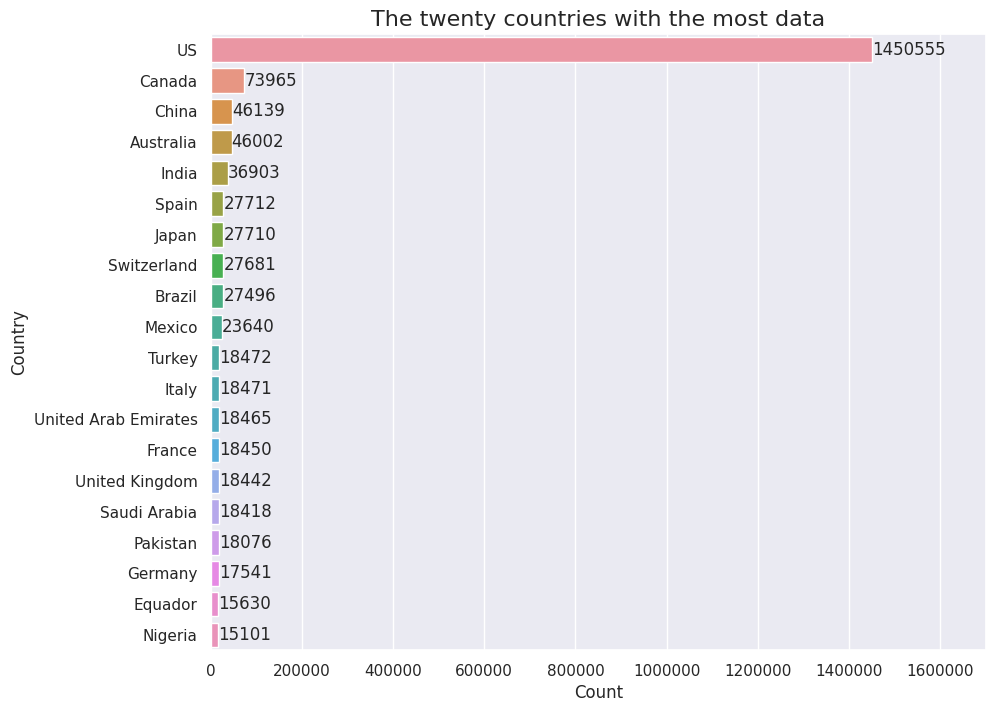

In [ ]:
plt.figure(figsize= (10, 8))
plt.ticklabel_format(style='plain', axis='x') # avoid scientific notation in xaxis
ax = sns.countplot(data= df.query('country in @top_20_countries'), y= 'country',
                   order= df.query('country in @top_20_countries').value_counts('country', ascending= False).index)
ax.set_title('The twenty countries with the most data', fontsize= 16)

for container in ax.containers:
  ax.bar_label(container, fmt= '%d', label_type= 'edge')

plt.xlim([0, 1.7e6])
ax.set_ylabel('Country')
ax.set_xlabel('Count')
plt.show()

The United States is the country with the most data. Taking into account only the dataframe with the processed data, the United States corresponds to approximately 51.32% of the data.

### 3.3.5 Average temperature per year

In [ ]:
country_temperature_per_year = df.query('year < 2020 and country in @country_count.keys()')\
                                 .groupby(['country', 'year'])['avg_temperature'].mean()\
                                 .reset_index()

fig = px.line(
    data_frame= country_temperature_per_year,
    x= 'year',
    y= 'avg_temperature',
    title= 'Average annual temperature for different countries',
    color= 'country', markers= True
)
fig.update_layout(title= {'x': 0.5}, xaxis_title= 'Year', yaxis_title= 'Average temperature')
fig.show()

Looking at the graph, you can see that:

* The countries with the highest temperature averages are: United Arab Emirates, Nigeria, Saudi Arabia and India very close, in addition to Ecuador and Pakistan.
* The countries with the lowest temperatures are: Canada, Germany, Switzerland, United Kingdom and France.
* Among the hottest countries there are representatives from South America, Africa, Asia and the Middle East.
* While among the coldest there are representatives of North America and Europe.
* From 2012, Ecuador and Canada, respectively, showed a trend of increasing and decreasing temperature.

### 3.3.6 Average temperature per quarter

In [ ]:
country_temperature_per_quarter = df.query('year < 2020 and country in @country_count.keys()')\
                                 .groupby(['country', 'quarter_of_year'])['avg_temperature'].mean()\
                                 .reset_index()

fig = px.line(
    data_frame= country_temperature_per_quarter,
    x= 'quarter_of_year',
    y= 'avg_temperature',
    title= 'Average quarter temperature for different countries',
    color= 'country', markers= True
)
fig.update_layout(title= {'x': 0.5}, xaxis_title= 'Year', yaxis_title= 'Average temperature')
fig.show()

## 3.4 Column `city`

### 3.4.1 Mean, median and standard deviation of average temperature per city

In [ ]:
city_count = df.value_counts('city', ascending= True).tail(20)# the 20 cities with the most records in the data set were selected.

top_20_cities = city_count.keys() # names of cities on the top 20 in number of records
top_20_cities

Index(['Juneau', 'Cincinnati', 'Reno', 'Huntsville', 'Roanoke', 'Kansas City',
       'Little Rock', 'Anchorage', 'San Diego', 'Atlanta', 'Fairbanks',
       'Shreveport', 'Oslo', 'Munich', 'Springfield', 'Columbus', 'Charleston',
       'Portland', 'Washington DC', 'Washington'],
      dtype='object', name='city')

In the set of 20 cities that appear the most in the data set, there are only two cities outside the United States, they are: Oslo, capital of Norway, and Munich, German city.

In [ ]:
df.query('city in @top_20_cities').groupby('city')['avg_temperature'].agg(['mean', 'median', 'std'])

,mean,median,std
city,,,
Anchorage,3.30,3.61,9.43
Atlanta,17.12,18.11,8.12
Charleston,15.95,17.44,8.81
Cincinnati,12.57,13.67,10.03
Columbus,15.33,16.89,9.66
Fairbanks,-1.97,0.11,15.81
Huntsville,16.52,17.61,8.67
Juneau,5.71,5.78,6.71
Kansas City,12.74,13.78,10.83


The measures show mild average temperatures, which makes sense since they are cities in colder countries.

### 3.4.2 Histograms of average temperature by cities

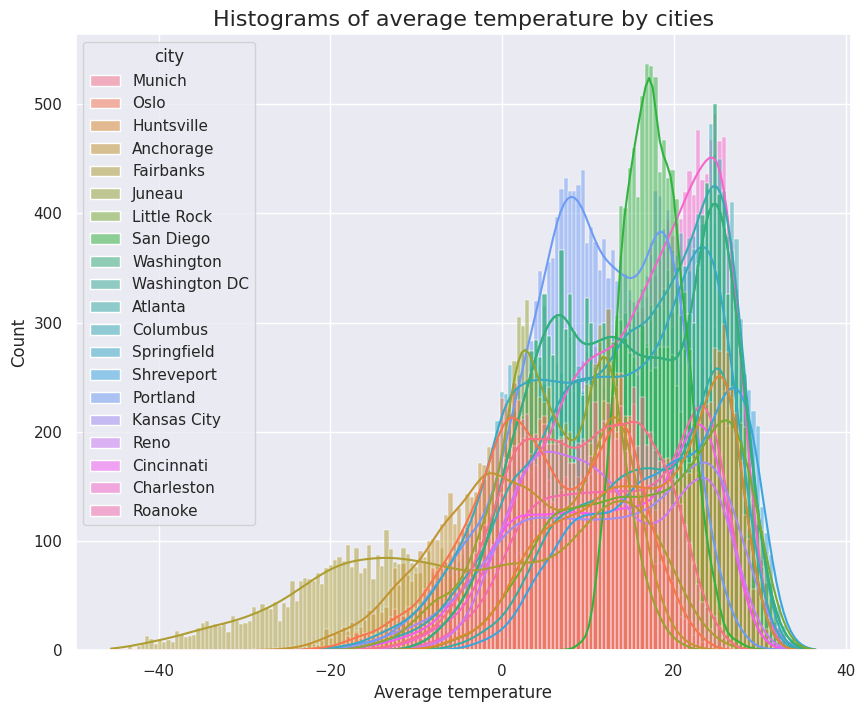

In [ ]:
plt.figure(figsize= (10, 8))
ax = sns.histplot(data= df.query('city in @top_20_cities'), x= 'avg_temperature', hue= 'city', kde= True)
ax.set_title('Histograms of average temperature by cities', fontsize= 16)
ax.set_xlabel('Average temperature')
plt.show()

### 3.4.3 Boxplots of average temperature by cities

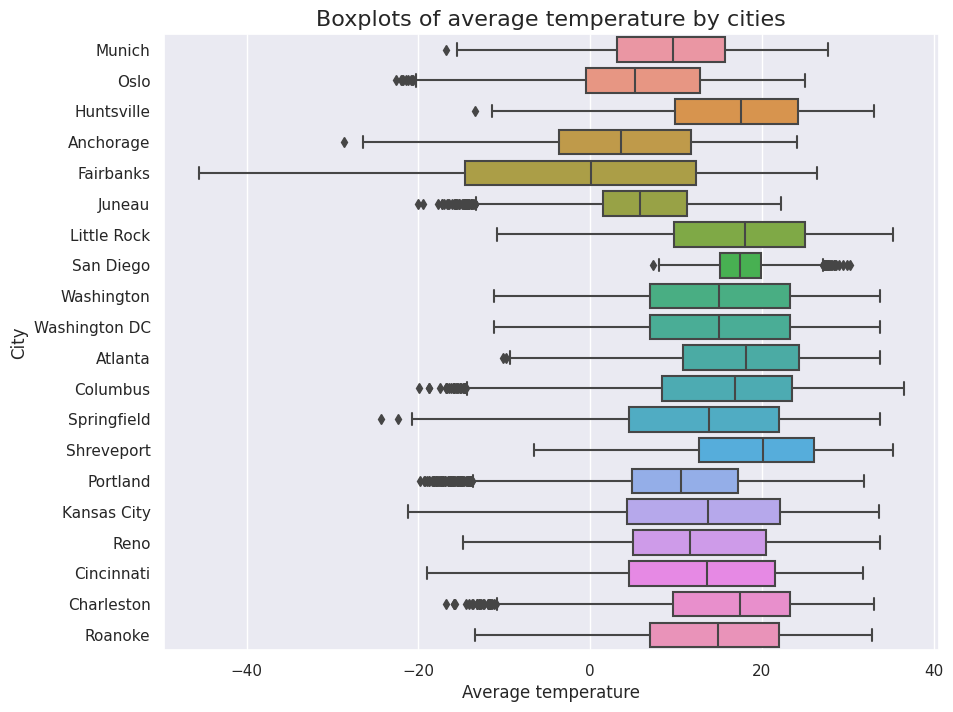

In [ ]:
plt.figure(figsize= (10, 8))
ax = sns.boxplot(data= df.query('city in @top_20_cities'), x= 'avg_temperature', y= 'city')
ax.set_title('Boxplots of average temperature by cities', fontsize= 16)
ax.set_ylabel('City')
ax.set_xlabel('Average temperature')
plt.show()

## 3.5 Column `century`

### 3.5.1 Distribution of data by century

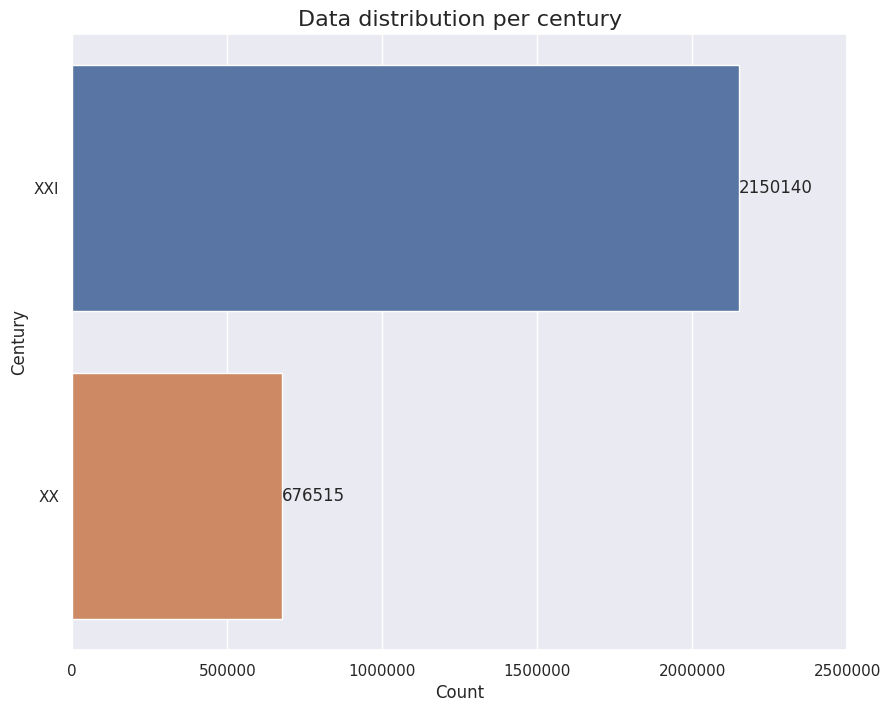

In [ ]:
pd.DataFrame({'Count': df.value_counts('century'),
              'Percentage (%)': round(df.value_counts('century', normalize= True) * 100, 2)})

plt.figure(figsize= (10, 8))
plt.ticklabel_format(style='plain', axis= 'x') # avoid scientific notation in xaxis
ax = sns.countplot(data= df, y= 'century', order= df.value_counts('century', ascending= False).index)
ax.set_title('Data distribution per century', fontsize= 16)

for index, container in enumerate(ax.containers):
  ax.bar_label(container, fmt= '%d', label_type= 'edge')

ax.set_ylabel('Century')
ax.set_xlabel('Count')
plt.xlim([0, 2.5e6]) # 2.5e6 is equivalent to 2,500,000
plt.show()

### 3.5.2 Mean, median and standard deviation of average temperature by century

In [ ]:
df.groupby('century')['avg_temperature'].agg(['mean', 'median', 'std'])

,mean,median,std
century,,,
XX,15.38,16.83,10.56
XXI,15.88,17.56,10.62


### 3.5.3 Histograms of average temperature by century


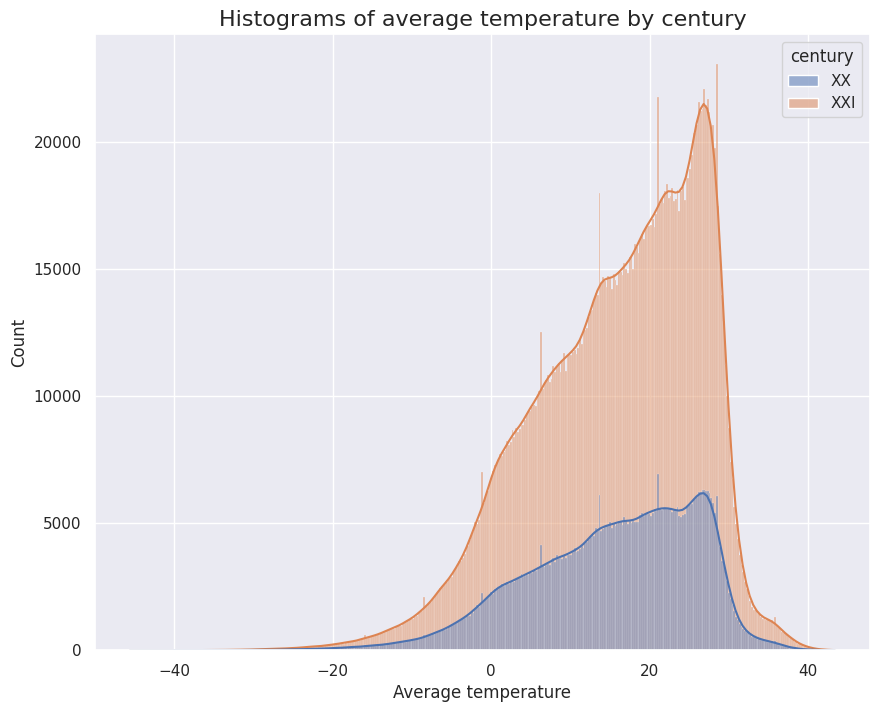

In [ ]:
plt.figure(figsize= (10, 8))
ax = sns.histplot(data= df, x= 'avg_temperature', hue= 'century', kde= True)
ax.set_title('Histograms of average temperature by century', fontsize= 16)
ax.set_xlabel('Average temperature')
plt.show()

### 3.5.4 Boxplots of average temperature by century

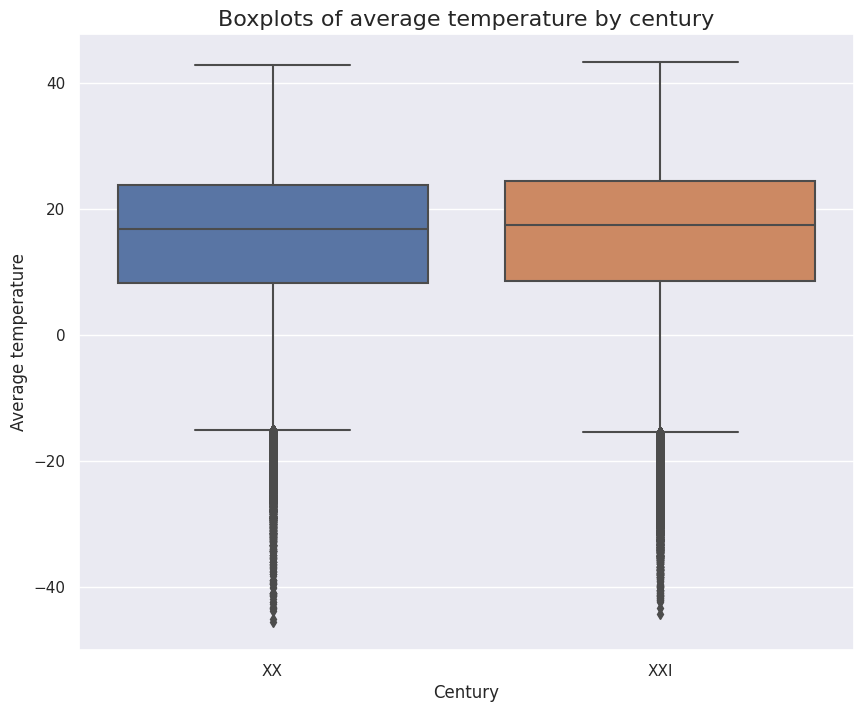

In [ ]:
plt.figure(figsize= (10, 8))
ax = sns.boxplot(data= df, y= 'avg_temperature', x= 'century')
ax.set_title('Boxplots of average temperature by century', fontsize= 16)
ax.set_ylabel('Average temperature')
ax.set_xlabel('Century')
plt.show()

# 4. Visualization of the average temperature by country

In [ ]:
map_df = df.query('year < 2020').groupby(['country', 'year'])[['avg_temperature']].mean().reset_index()

fig = px.choropleth(
    map_df, locations= 'country', locationmode= 'country names',
    animation_frame= 'year', color= 'avg_temperature',
    hover_name= 'country', color_continuous_scale= 'RdYlBu_r',
    title= 'Average temperature of countries between 1995 - 2019'
)
fig.update_layout(title= {'x': 0.5})
fig.show()